In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## In this example, we are identifying the most profitable investments for each month. 
## For each month, we start with an initial amount of 10,000 PLN.

In [3]:
monthly_avg = pd.read_excel('data/monthly_avg.xlsx', index_col='Date')
percent_changes = pd.read_excel('data/percent_changes.xlsx', index_col='Date')

In [4]:
initial_amount = 10000

investment_values = initial_amount * (1+(percent_changes / 100)).cumprod()

investment_profits = investment_values - initial_amount

average_monthly_profit = investment_profits.mean(axis=1)
monthly_profit_std_dev = investment_profits.std(axis=1)

best_investment_currency = percent_changes.idxmax(axis=1)
best_investment_value = percent_changes.max(axis=1)

monthly_investment_analysis = pd.DataFrame({
    'Best Investment Currency': best_investment_currency,
    'Percent Change': best_investment_value,
    'End Value': investment_values.max(axis=1),
    'Profit': investment_profits.max(axis=1),
    'Average Monthly Profit': average_monthly_profit,
    'Profit Std Dev (Risk)': monthly_profit_std_dev
})
monthly_investment_analysis[['End Value', 'Profit', 'Average Monthly Profit',
                             'Profit Std Dev (Risk)']] = monthly_investment_analysis[['End Value', 'Profit', 'Average Monthly Profit',
                                                                                      'Profit Std Dev (Risk)']].round(4)

monthly_investment_analysis

,Best Investment Currency,Percent Change,End Value,Profit,Average Monthly Profit,Profit Std Dev (Risk)
Date,,,,,,
7.2023,NOK,3.55,10355.0000,355.0000,22.7143,172.6825
8.2023,USD,1.72,10341.5385,341.5385,67.2219,181.1365
9.2023,USD,5.27,10619.7259,619.7259,443.3619,159.9960
10.2023,UAH,0.26,10568.9363,568.9363,275.4086,216.4199
11.2023,EUR,-2.52,10171.5443,171.5443,-74.1381,152.0948
12.2023,NOK,0.78,10094.9475,94.9475,-184.5552,150.4580
1.2024,NOK,2.42,10258.4856,258.4856,-104.7283,243.6442
2.2024,USD,0.21,10065.6261,65.6261,-190.0829,196.6109
3.2024,EUR,-0.46,9890.0114,-109.9886,-332.1670,208.8207


In [5]:
monthly_investment_analysis.to_excel('data/monthly_investment_analysis.xlsx')

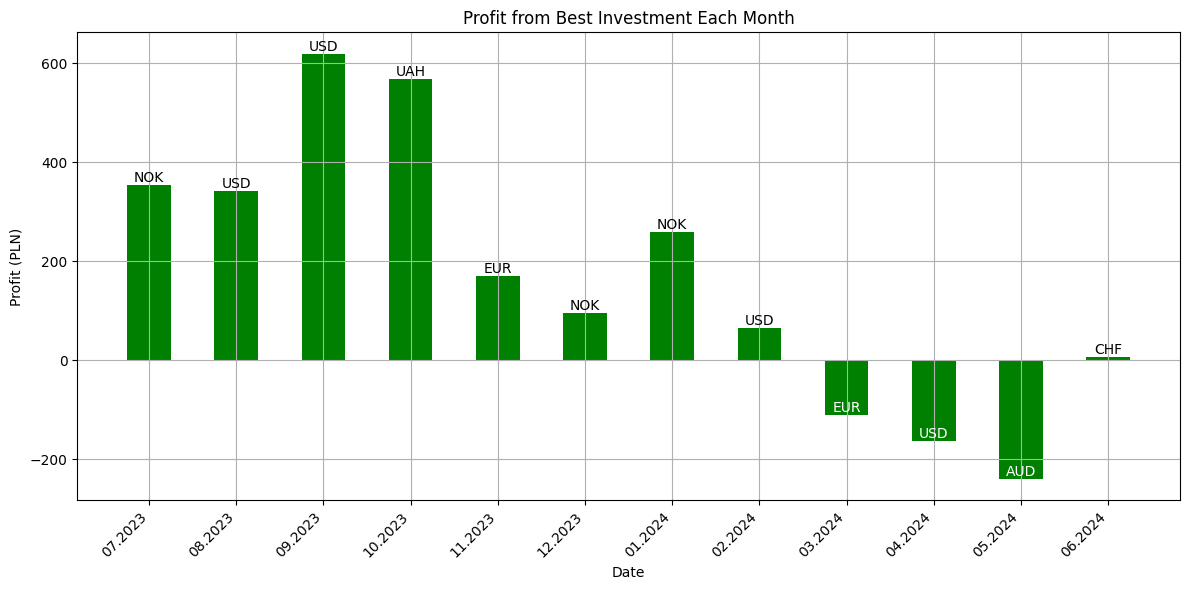

In [6]:
data = {
    'Best Investment Currency': ['NOK', 'USD', 'USD', 'UAH', 'EUR', 'NOK', 'NOK', 'USD', 'EUR', 'USD', 'AUD', 'CHF'],
    'Percent Change': [3.55, 1.72, 5.27, 0.26, -2.52, 0.78, 2.42, 0.21, -0.46, 1.20, 0.43, 3.20],
    'End Value': [10355.0000, 10341.5385, 10619.7259, 10568.9363, 10171.5443, 10094.9475, 10258.4856, 10065.6261, 9890.0114, 9837.0950, 9760.2515, 10006.2099],
    'Profit': [355.0000, 341.5385, 619.7259, 568.9363, 171.5443, 94.9475, 258.4856, 65.6261, -109.9886, -162.9050, -239.7485, 6.2099],
    'Average Monthly Profit': [22.7143, 67.2219, 443.3619, 275.4086, -74.1381, -184.5552, -104.7283, -190.0829, -332.1670, -355.7920, -427.3649, -268.8599],
    'Profit Std Dev (Risk)': [172.6825, 181.1365, 159.9960, 216.4199, 152.0948, 150.4580, 243.6442, 196.6109, 208.8207, 204.0860, 260.3534, 345.9103]
}
index = pd.to_datetime(['7.2023', '8.2023', '9.2023', '10.2023', '11.2023', '12.2023', '1.2024', '2.2024',
                        '3.2024', '4.2024', '5.2024', '6.2024'], format='%m.%Y')
monthly_investment_analysis = pd.DataFrame(data, index=index)

months = range(len(monthly_investment_analysis.index))

plt.figure(figsize=(12, 6))
bars = plt.bar(months, monthly_investment_analysis['Profit'], color='g', width=0.5)  
plt.title('Profit from Best Investment Each Month')
plt.xlabel('Date')
plt.ylabel('Profit (PLN)')
plt.grid(True)

plt.xticks(ticks=months, labels=monthly_investment_analysis.index.strftime('%m.%Y'), rotation=45, ha='right')

for bar, profit, label in zip(bars, monthly_investment_analysis['Profit'], monthly_investment_analysis['Best Investment Currency']):
    height = bar.get_height()
    color = 'white' if profit < 0 else 'black'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', color=color)

plt.tight_layout()

plt.savefig('data/profit_monthly.pdf')
plt.show()